/var/folders/98/44_jx5w1141cm63zl6l80hbm0000gn/T/ipykernel_61395/424638099.py:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)


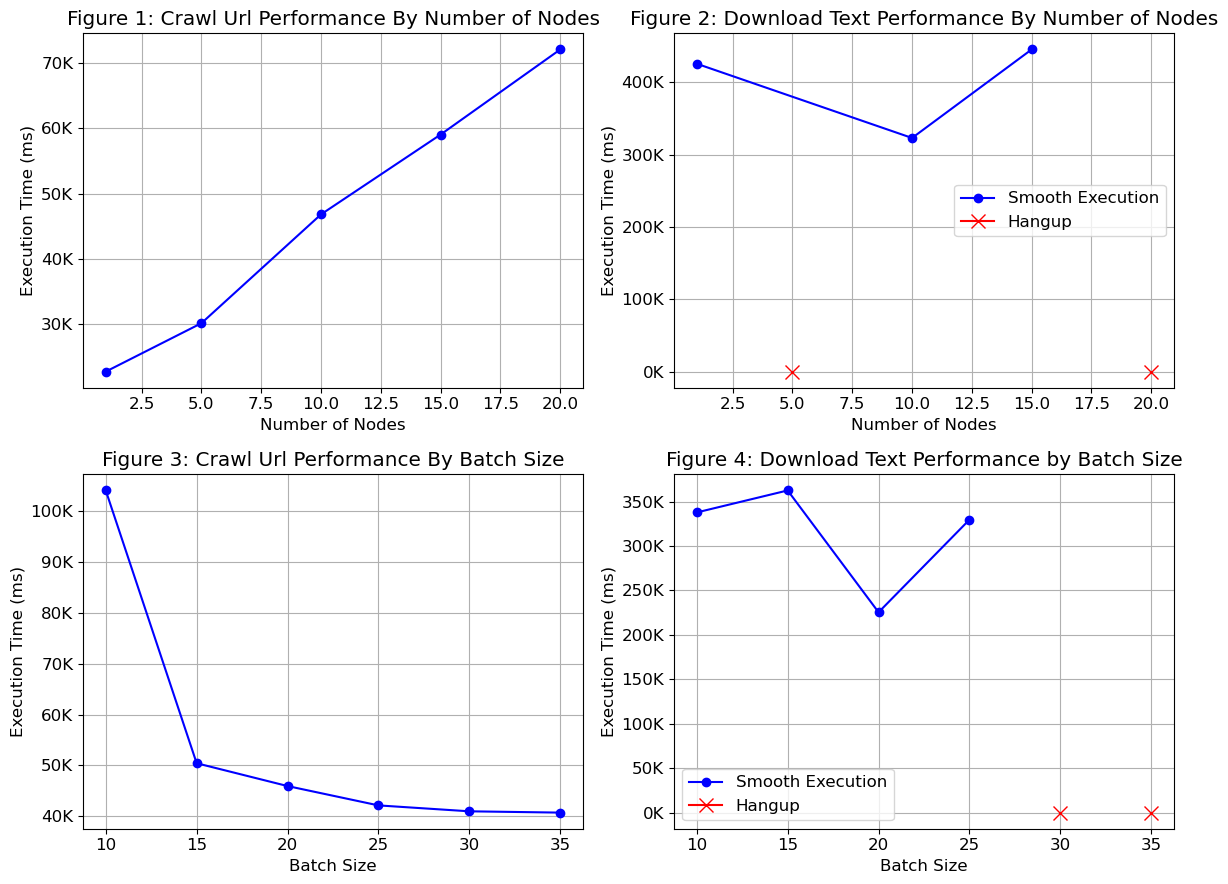

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'
plt.rcParams.update({'font.size': 11}) 
plt.rcParams['figure.constrained_layout.use'] = True


numNodes = [1]

#in MS
timesNodeCrawUrl = [48193]
timesNodeDownloadText = [300445]
timesNodeIndex = [499729]

##in MB
dataStoredCrawlUrl = [0.457438]
dataStoredDownloadText = [20.7683]
dataStoredIndex = [8.66655]



# Data for third plot
batchSizes1 = [10, 15, 20, 25, 30, 35]
times_ms3 = [104038, 50427, 45942, 42141, 40980, 40724]

# Data for fourth plot
batchSizes2 = [10, 15, 20, 25, 30, 35]
times_ms4 = [337856, 362619, 225502, 329732, None, None]  # None for hangup cases

# Creating the figure and subplots
plt.figure(figsize=(12, 9))

# First subplot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(numNodes1, times_ms1, marker='o', linestyle='-', color='b')
ax1.set_title('Figure 1: Crawl Url Performance By Number of Nodes')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Execution Time (ms)')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax1.grid(True)

# Second subplot
ax2 = plt.subplot(2, 2, 2)
valid_times2 = [time for time in times_ms2 if time is not None]
valid_nodes2 = [numNodes2[i] for i in range(len(numNodes2)) if times_ms2[i] is not None]
ax2.plot(valid_nodes2, valid_times2, marker='o', linestyle='-', color='b', label='Smooth Execution')
hangup_nodes2 = [numNodes2[i] for i in range(len(numNodes2)) if times_ms2[i] is None]
if hangup_nodes2:
    ax2.plot(hangup_nodes2[0], 0, marker='x', color='r', markersize=10, label='Hangup')
    for node in hangup_nodes2[1:]:
        ax2.plot(node, 0, marker='x', color='r', markersize=10)
ax2.set_title('Figure 2: Download Text Performance By Number of Nodes')
ax2.set_xlabel('Number of Nodes')
ax2.set_ylabel('Execution Time (ms)')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax2.grid(True)
ax2.legend()

# Third subplot
ax3 = plt.subplot(2, 2, 3)
ax3.plot(batchSizes1, times_ms3, marker='o', linestyle='-', color='b')
ax3.set_title('Figure 3: Crawl Url Performance By Batch Size')
ax3.set_xlabel('Batch Size')
ax3.set_ylabel('Execution Time (ms)')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax3.grid(True)


# Fourth subplot
ax4 = plt.subplot(2, 2, 4)
valid_times4 = [time for time in times_ms4 if time is not None]
valid_batch_sizes4 = [batchSizes2[i] for i in range(len(batchSizes2)) if times_ms4[i] is not None]
ax4.plot(valid_batch_sizes4, valid_times4, marker='o', linestyle='-', color='b', label='Smooth Execution')
hangup_batch_sizes4 = [batchSizes2[i] for i in range(len(batchSizes2)) if times_ms4[i] is None]
if hangup_batch_sizes4:
    ax4.plot(hangup_batch_sizes4[0], 0, marker='x', color='r', markersize=10, label='Hangup')
    for batch_size in hangup_batch_sizes4[1:]:
        ax4.plot(batch_size, 0, marker='x', color='r', markersize=10)
ax4.set_title('Figure 4: Download Text Performance by Batch Size')
ax4.set_xlabel('Batch Size')
ax4.set_ylabel('Execution Time (ms)')
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax4.grid(True)
ax4.legend()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('performance_plots.png', dpi=300)

# Show the plot
plt.show()
